# finding p_c of dp2 class

0
[[0.418 0.301 0.258 ... 0.025 0.027 0.029]
 [0.464 0.353 0.357 ... 0.02  0.023 0.021]
 [0.528 0.476 0.475 ... 0.132 0.136 0.138]
 [0.544 0.5   0.493 ... 0.272 0.271 0.265]
 [0.595 0.522 0.55  ... 0.496 0.497 0.521]]


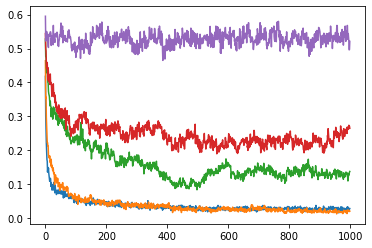

In [45]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
rho_sim=[]
for sim in range(1):
        
        print(sim)
        L=1000
        lattice_o = np.zeros((L,L), dtype=int)
        lattice_o[0,0:L]=np.random.choice([0,1 ,2], size=(L), p=[0.33,0.33,0.34])
#         lattice_o[0,int(L/2)]=2
    
        pv = [0.3,0.4,0.5673,0.6,0.7]
        sum_list=[]
        rho=[]
        for k in range(len(pv)):
            lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p

            for j in range(1,L):
                for i in range(0,L):
                    if ((i!=L-1) and (i!=0)):
                        z=np.random.rand(1)[0]
                        if lattice[j-1,i-1]==2 and lattice[j-1,i+1]==2 :
                            if z<q:
                                lattice[j,i]= 2
                            else:
                                lattice[j,i]= np.random.choice([0, 1], size=(1), p=[0.5, 0.5])[0]
                                
                            
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==0) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1) :
                            lattice[j,i]= lattice[j-1,i-1]
                        
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==0) :
                            if z<p:
                                lattice[j,i]= 2
                            else: lattice[j,i]= 0
    
                        elif (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==1) :
                            if z<p:
                                lattice[j,i]= 2
                            else: lattice[j,i]= 1
                                                                                       
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==1) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==0) :
                             lattice[j,i]= 2
#                     else:
#                         if lattice[j-1,i]==2:
#                                 lattice[j,i]= np.random.choice([0, 1, 2], size=(1), p=[(1-p)/2,(1-p)/2, p])[0]
#                         else:
#                             lattice[j,i]=lattice[j-1,i]
                    
                        
                        
                sum_list.append((list(lattice[j,:])).count(2)/(L))
#             print((list(lattice[j,:])).count(2))
            rho.append(sum_list)
            sum_list=[]
        rho_sim.append(rho)
a = np.mean(np.array(rho_sim),axis=0)
# print(lattice)
print(a)
plt.plot(a[0])
plt.plot(a[1])
plt.plot(a[2])
plt.plot(a[3])
plt.plot(a[4])
# plt.plot(a[5])
# plt.plot(a[6])




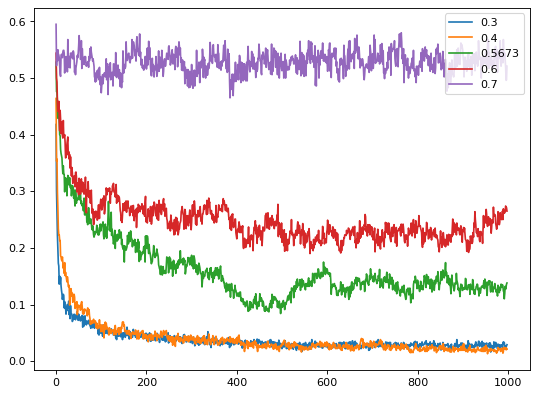

In [46]:
figure(figsize=(8, 6), dpi=80)
plt.plot(a[0],label=pv[0] )
# plt.axhline(y =mean(a[0][5500:]))
plt.plot(a[1],label=pv[1])
# plt.axhline(y =mean(a[1][5000:]))

plt.plot(a[2],label=pv[2])
# plt.axhline(y =mean(a[2][5000:]))
plt.plot(a[3],label=pv[3])
# plt.axhline(y =mean(a[3][5500:]))

plt.plot(a[4],label=pv[4])
# plt.axhline(y =mean(a[4][5500:]))


plt.legend(loc="upper right")

## Try to find $\beta$ by $\rho_{stat}$ method

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
[[0.56682 0.55514 0.51052 ... 0.09611 0.09748 0.09616]
 [0.57771 0.5661  0.52155 ... 0.14605 0.14496 0.14385]
 [0.58841 0.57555 0.53014 ... 0.19937 0.19911 0.19996]
 ...
 [0.60695 0.5924  0.55361 ... 0.31425 0.31329 0.31409]
 [0.61703 0.59981 0.56414 ... 0.36057 0.36176 0.36171]
 [0.63007 0.60862 0.57544 ... 0.40267 0.40015 0.40122]]


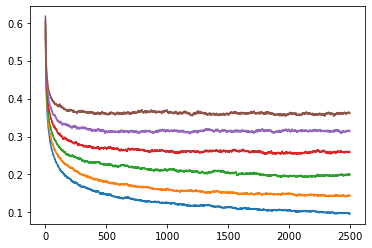

In [190]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
rho_sim=[]
for sim in range(40):
        
        print(sim)
        L=2500
        lattice_o = np.zeros((L,L), dtype=int)
        lattice_o[0,0:L]=np.random.choice([0,1 ,2], size=(L), p=[0,0, 1])
#         lattice_o[0,int(L/2)]=2
    
#         pv = [0.5673,0.569,0.572,0.579,0.582,0.589, 0.592,0.6,0.61,0.62,0.63,0.64,0.65,0.66]
        pv = [0.569,0.579,0.589,0.599,0.609,0.619,0.629]
#         pv=[0.58]

        sum_list=[]
        rho=[]
        for k in range(len(pv)):
            lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p

            for j in range(1,L):
                for i in range(0,L):
                    if ((i!=L-1) and (i!=0)):
                        z=np.random.rand(1)[0]
                        if lattice[j-1,i-1]==2 and lattice[j-1,i+1]==2 :
                            if z<q:
                                lattice[j,i]= 2
                            else:
                                lattice[j,i]= np.random.choice([0, 1], size=(1), p=[0.5, 0.5])[0]
                                
                            
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==0) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1) :
                            lattice[j,i]= lattice[j-1,i-1]
                        
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==0) :
                            if z<p:
                                lattice[j,i]= 2
                            else: lattice[j,i]= 0
    
                        elif (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==1) :
                            if z<p:
                                lattice[j,i]= 2
                            else: lattice[j,i]= 1
                                                                                       
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==1) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==0) :
                             lattice[j,i]= 2
#                     else:
#                         if lattice[j-1,i]==2:
#                                 lattice[j,i]= np.random.choice([0, 1, 2], size=(1), p=[(1-p)/2,(1-p)/2, p])[0]
#                         else:
#                             lattice[j,i]=lattice[j-1,i]
                        
                sum_list.append((list(lattice[j,:])).count(2)/(L))

            rho.append(sum_list)
            sum_list=[]
        rho_sim.append(rho)
a = np.mean(np.array(rho_sim),axis=0)
print(a)
plt.plot(a[0])
plt.plot(a[1])
plt.plot(a[2])
plt.plot(a[3])
plt.plot(a[4])
plt.plot(a[5])






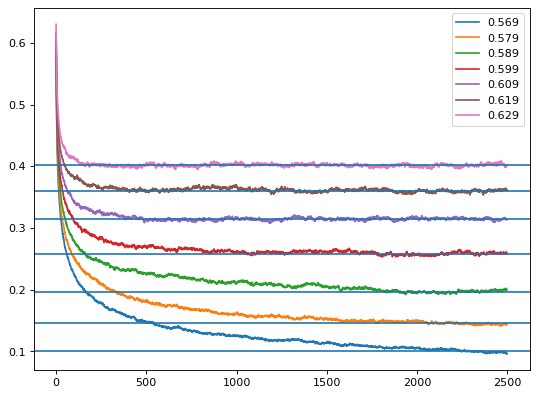

In [192]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=80)

# pv = [0.5673,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66]


plt.plot(a[0],label=pv[0] )
plt.axhline(y =mean(a[0][2000:]))
plt.plot(a[1],label=pv[1])
plt.axhline(y =mean(a[1][2000:]))

plt.plot(a[2],label=pv[2])
plt.axhline(y =mean(a[2][2000:]))
plt.plot(a[3],label=pv[3])
plt.axhline(y =mean(a[3][2000:]))

plt.plot(a[4],label=pv[4])
plt.axhline(y =mean(a[4][2000:]))

plt.plot(a[5],label=pv[5])
plt.axhline(y =mean(a[5][2000:]))

plt.plot(a[6],label=pv[6])
plt.axhline(y =mean(a[6][2000:]))



plt.legend(loc="upper right")

In [193]:
m= [i-0.5673 for i in pv]
m

[0.0016999999999999238,
 0.011699999999999933,
 0.02169999999999994,
 0.03169999999999995,
 0.04169999999999996,
 0.05169999999999997,
 0.06169999999999998]

In [148]:
m[0]=0.01

In [201]:
b=[mean(a[i][2300:]) for i in [0,1,2,3,4,5,6]]#,6,7,8,9,10,11,12,13]]
b

[0.0986911055276382,
 0.14385216080402008,
 0.1982197487437186,
 0.25887251256281407,
 0.31415346733668337,
 0.36064180904522614,
 0.4028574371859297]

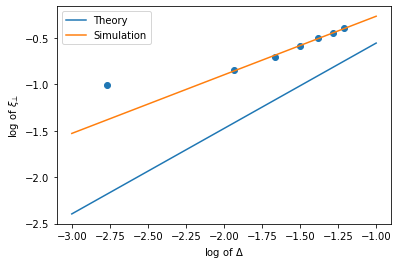

In [35]:
plt.scatter(np.log10(m),np.log10(b))
x=np.array(np.log10(m[1:]))

y=np.array(np.log10(b[1:]))

i,s =np.polyfit(x,y,1)

xp = np.linspace(-3, -1, 100)
ppp=xp*i+s
yyy=xp*(0.92)+s

plt.plot(xp,yyy,label="Theory")
plt.plot(xp,ppp,label="Simulation")

plt.xlabel(r"log of $\Delta$")
plt.ylabel(r"log of $\xi_{\bot}$")
plt.legend(loc="upper left")

In [34]:
display(Latex(r'The $\beta$ is:'),i)

<IPython.core.display.Latex object>

0.6310431527344228

### to find $\delta$ I measure  the survival probability p(t) and use this formula:
 $$p(t) \sim t^{-\delta}$$
### where :  $$\delta = \frac{\beta}{\nu_{||}}$$

### assuming we obtain $\beta$ with previous method we will have $\nu_{||}$

In [1]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

pv=[0.5673]
t_total=[]
for k in range(len(pv)):
            print(k)
#             lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p
# rho_sim=[]
            L=5000
            num_sim=300
            
            all_prob=[]
            prob = np.zeros((L,1), dtype=int)
            for sim in tqdm(range(num_sim)):
#                     prob = np.zeros((L,L), dtype=int)
#                     print(sim)

                    lattice = np.zeros((L,L), dtype=int)
#                     lattice[0,0:L]=np.random.choice([0, 1], size=(L), p=[0,1])
#                     lattice[0,0:L]=np.random.choice([0,1], size=(L), p=[0.5,0.5])
                    lattice[0,int(L/2)]=2

#                     sum_list=[]
#                     rho=[]


                    for j in range(1,L):
                        for i in range(0,L):
                            if ((i!=L-1) and (i!=0)):
                                z=np.random.rand(1)[0]
                                if lattice[j-1,i-1]==2 and lattice[j-1,i+1]==2 :
                                    if z<q:
                                        lattice[j,i]= 2
                                    else:
                                        lattice[j,i]= np.random.choice([0, 1], size=(1), p=[0.5, 0.5])[0]


                                elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==0) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1) :
                                    lattice[j,i]= lattice[j-1,i-1]

                                elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==0) :
                                    if z<p:
                                        lattice[j,i]= 2
                                    else: lattice[j,i]= 0

                                elif (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==1) :
                                    if z<p:
                                        lattice[j,i]= 2
                                    else: lattice[j,i]= 1

                                elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==1) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==0) :
                                     lattice[j,i]= 2
                        if all([zeroch!=2 for zeroch in lattice[j,:]])== False:
                                              prob[j,0] +=1

            prob=prob/num_sim

            
            t_total.append(prob)
print(t_total)


0


100%|███████████████████████████████████████| 300/300 [6:04:24<00:00, 72.88s/it]

[array([[0.        ],
       [0.81666667],
       [0.67666667],
       ...,
       [0.07333333],
       [0.07333333],
       [0.07333333]])]


In [2]:
with open("p(t)_t_dp2_300_5000.txt", 'w') as output:
    for row in t_total[0]:
        output.write(str(row) + '\n')

In [82]:
with open("p(t)_t_dp2_300_5000.txt", 'r') as file:
        total= [float(line.replace("[",'').replace("]","")) for line in file]


In [55]:
x=range(5001)

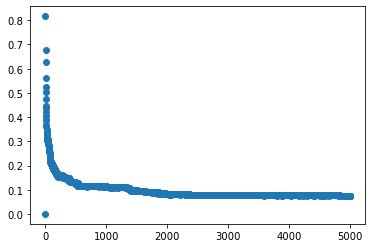

In [57]:
plt.scatter(x[1:],total)

In [83]:
x_1=np.array(np.log10(x[2:]))
y_1=np.array(np.log10(total[1:]))

ii,ss =np.polyfit(x_1,y_1,1)


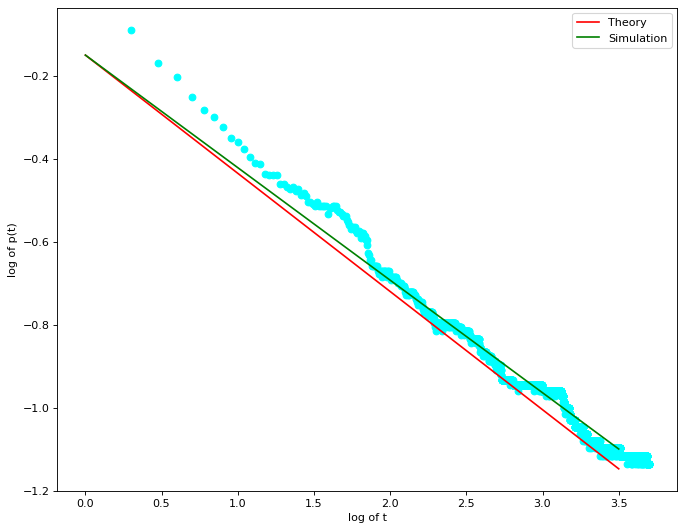

In [69]:
figure(figsize=(10, 8), dpi=80)

xp = np.linspace(0, 3.5, 100)
ppp=xp*ii+ss
yyy=xp*(-0.285)+ss

plt.scatter(np.log10(x[2:]),np.log10(total[1:]),color='aqua')
plt.plot(xp,yyy,label="Theory",color='red')
plt.plot(xp,ppp,label="Simulation",color='green')

plt.xlabel(r"log of t")
plt.ylabel(r"log of p(t)")
plt.legend(loc="upper right")

plt.show()


In [85]:
display(Latex(r'The $\delta$ is:'),-ii)

<IPython.core.display.Latex object>

0.27135709657173435

### to find $\eta$ I measure  the number of active sites N(t) and use this formula:
 $$N(t) \sim t^{\eta}$$


In [12]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
rho_sim=[]
for sim in tqdm(range(300)):
        
        L=5000
        lattice_o = np.zeros((L,L), dtype=int)
#         lattice_o[0,0:L]=np.random.choice([0,1 ,2], size=(L), p=[0,0, 1])
        lattice_o[0,int(L/2)]=2
    
#         pv = [0.5673,0.569,0.572,0.579,0.582,0.589, 0.592,0.6,0.61,0.62,0.63,0.64,0.65,0.66]
#         pv = [0.569,0.579,0.589,0.599,0.609,0.619,0.629]
#         pv=[0.58]
        pv=[0.5673]

        sum_list=[]
        rho=[]
        for k in range(len(pv)):
            lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p

            for j in range(1,L):
                for i in range(0,L):
                    if ((i!=L-1) and (i!=0)):
                        z=np.random.rand(1)[0]
                        if lattice[j-1,i-1]==2 and lattice[j-1,i+1]==2 :
                            if z<q:
                                lattice[j,i]= 2
                            else:
                                lattice[j,i]= np.random.choice([0, 1], size=(1), p=[0.5, 0.5])[0]
                                
                            
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==0) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1) :
                            lattice[j,i]= lattice[j-1,i-1]
                        
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==0) :
                            if z<p:
                                lattice[j,i]= 2
                            else: lattice[j,i]= 0
    
                        elif (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==1) :
                            if z<p:
                                lattice[j,i]= 2
                            else: lattice[j,i]= 1
                                                                                       
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==1) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==0) :
                             lattice[j,i]= 2

                sum_list.append((list(lattice[j,:])).count(2))

#             rho.append(sum_list)
#             sum_list=[]
        rho_sim.append(sum_list)
a = np.mean(np.array(rho_sim),axis=0)
print(a)






100%|███████████████████████████████████████| 300/300 [6:10:41<00:00, 74.14s/it]

[1.15333333 1.11666667 1.10666667 ... 1.21333333 1.22333333 1.24666667]


In [14]:
with open("n(t)_t_dp2_300_5000.txt", 'w') as output:
    for row in a:
        output.write(str(row) + '\n')

In [86]:
with open("n(t)_t_dp2_300_5000.txt", 'r') as file:
        total= [float(line.replace("[",'').replace("]","")) for line in file]


In [73]:
x=range(5001)

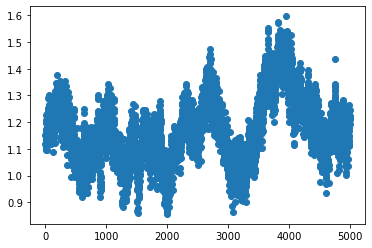

In [75]:
plt.scatter(x[1:5000],total)

In [87]:
x_1=np.array(np.log10(x[1:5000]))
y_1=np.array(np.log10(total))

ii,ss =np.polyfit(x_1,y_1,1)

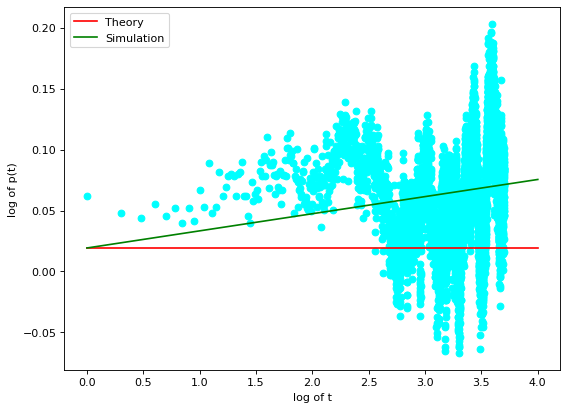

In [81]:
figure(figsize=(8, 6), dpi=80)

xp = np.linspace(0, 4, 100)
ppp=xp*ii+ss
yyy=xp*0+ss

plt.scatter(np.log10(x[1:5000]),np.log10(total),color='aqua')
plt.plot(xp,yyy,label="Theory",color='red')
plt.plot(xp,ppp,label="Simulation",color='green')

plt.xlabel(r"log of t")
plt.ylabel(r"log of N(t)")
plt.legend(loc="upper left")

plt.show()


In [88]:
display(Latex(r'The $\eta$ is:'),ii)

<IPython.core.display.Latex object>

0.014059435902433614

### in this step I calculate the mean square of spreading from the origin $R^{2}(t)$ averaged over active runs, and use this formula: 
$$R^{2}(t) \sim t^{z}$$
### where $$z= \frac{\nu_{\bot}}{\nu_{||}}$$


In [24]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

# pv = [0.2,0.25,0.3,0.35,0.4,0.42,0.44,0.47,0.49,0.5,0.52,0.53,0.535,0.544701,0.55701]#,0.724701,0.734701]#,0.67,0.7,0.8]
pv=[0.5673]
all_prob=[]
for k in range(len(pv)):
            print(k)
#             lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p
# rho_sim=[]
            L=5000
            num_sim=300
            
            prob = np.zeros((L,num_sim), dtype=int)
            
            for sim in tqdm(range(num_sim)):
                    
#                     prob = np.zeros((L,L), dtype=int)
#                     print(sim)

                    lattice = np.zeros((L,L), dtype=int)
#                     lattice[0,0:L]=np.random.choice([0, 1], size=(L), p=[0,1])
#                     lattice[0,0:L]=np.random.choice([0,1], size=(L), p=[0.5,0.5])
                    lattice[0,int(L/2)]=2
                    
    

#                     sum_list=[]
#                     rho=[]


                    for j in range(1,L):
                        for i in range(0,L):
                            if ((i!=L-1) and (i!=0)):
                                z=np.random.rand(1)[0]
                                if lattice[j-1,i-1]==2 and lattice[j-1,i+1]==2 :
                                    if z<q:
                                        lattice[j,i]= 2
                                    
                        res = [idx for idx, val in enumerate(lattice[j,:]) if val == 2]
                        
                        spr_org=[(mem- int(L/2))**2 for mem in res]
                        
                        
                        if len(spr_org)==0:
                            length=0
                        else:
                            length=np.mean(spr_org)
                            
                            
                        prob[j,sim]=length
                        
                    
                    all_prob.append(prob[:,sim])
    
            

print(all_prob)

ave=np.zeros((L,1), dtype=float)
for s in range (0,L):
    tot=0
    sumi=0
    for ss in range(num_sim):
        sumi=sumi+all_prob[ss][s]
        if all_prob[ss][s]!=0:
            tot+=1
    ave[s,0]=sumi/tot
            
# a = np.mean(np.array(all_prob),axis=0)

print(ave)

        

0


100%|███████████████████████████████████████| 300/300 [5:31:23<00:00, 66.28s/it]
/tmp/ipykernel_4470/751252699.py:108: RuntimeWarning: invalid value encountered in long_scalars
  ave[s,0]=sumi/tot


[array([0, 1, 4, ..., 0, 0, 0]), array([0, 1, 2, ..., 0, 0, 0]), array([0, 1, 2, ..., 0, 0, 0]), array([    0,     1,     2, ..., 10267, 14412, 19249]), array([0, 1, 2, ..., 0, 0, 0]), array([0, 1, 4, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]), array([   0,    1,    4, ..., 3535, 3136, 3756]), array([0, 1, 4, ..., 0, 0, 0]), array([0, 1, 2, ..., 0, 0, 0]), array([0, 1, 4, ..., 0, 0, 0]), array([0, 1, 2, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 1, 4, ..., 0, 0, 0]), array([0, 1, 2, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 1, 2, ..., 0, 0, 0]), array([0, 1, 2, ..., 0, 0, 0]), array([0, 1, 2, ..., 0, 0, 0]), array([    0,     1,     2, ..., 18161, 16777, 14220]), array([0, 1, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]), array([0, 1, 4, ..., 0, 0, 0]), array([0, 1, 4, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([    0,     1,     2, ..., 3538

[[        nan]
 [1.00000e+00]
 [2.95000e+00]
 ...
 [1.22111e+04]
 [1.26329e+04]
 [1.22036e+04]]


In [60]:
with open("r(t)_t_dp2_300_5000.txt", 'w') as output:
    for row in ave:
        output.write(str(row) + '\n')

In [111]:
with open("r(t)_t_dp2_300_5000.txt", 'r') as file:
        data_1 = [float(line.strip()) for line in file]
    


In [112]:
x=range(1,5000)

In [113]:
ave2 = [x for x in data_1 if (math.isnan(x) == False)]
len(ave2)

4999

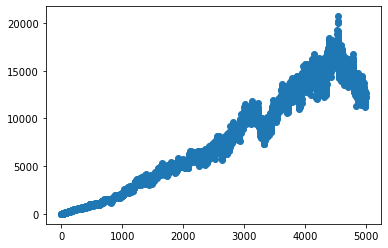

In [114]:

# import matplotlib.pyplot as plt
plt.scatter(x[:],ave2[:])

In [118]:
x_1=np.array(np.log10(x[:]))
y_1=np.array(np.log10(ave2[:]))

ii,ss =np.polyfit(x_1,y_1,1)


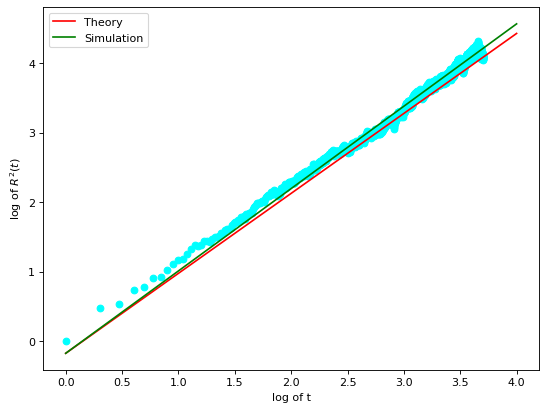

In [119]:
figure(figsize=(8, 6), dpi=80)

xp = np.linspace(0, 4, 100)
ppp=xp*ii+ss
yyy=xp*(1.15)+ss
plt.scatter(np.log10(x[:]),np.log10(ave2[:]),color='aqua')
plt.plot(xp,yyy,label="Theory",color='red')
plt.plot(xp,ppp,label="Simulation",color='green')

plt.xlabel(r"log of t")
plt.ylabel(r"log of $R^{2}(t)$")
plt.legend(loc="upper left")

plt.show()

In [120]:
display(Latex(r'The z is:'),ii)

<IPython.core.display.Latex object>

1.184494673731342

$z=1.184494673731342 \Longrightarrow \nu_{\bot}= \nu_{||} \times z = 3.31 \times 1.184494673731342 = 3.920677370050742 $

### In the final step I need a method to calculate $\nu_{||}$ since $\beta$ was not determine close to real value.

### therefore I plot $\rho t^{\delta}$ vs $t \Delta ^{\nu_{||}}$ try to tune $\delta$ and $\nu_{||}$ untill the plots colapse

  0%|                                                    | 0/40 [00:00<?, ?it/s]

0


  2%|█                                           | 1/40 [01:31<59:10, 91.05s/it]

1


  5%|██▏                                         | 2/40 [03:00<57:07, 90.20s/it]

2


  8%|███▎                                        | 3/40 [04:28<55:03, 89.28s/it]

3


 10%|████▍                                       | 4/40 [05:59<53:54, 89.85s/it]

4


 12%|█████▌                                      | 5/40 [07:28<52:11, 89.47s/it]

5


 15%|██████▌                                     | 6/40 [08:58<50:49, 89.68s/it]

6


 18%|███████▋                                    | 7/40 [10:29<49:34, 90.15s/it]

7


 20%|████████▊                                   | 8/40 [12:00<48:12, 90.40s/it]

8


 22%|█████████▉                                  | 9/40 [13:30<46:40, 90.34s/it]

9


 25%|██████████▊                                | 10/40 [15:00<45:03, 90.11s/it]

10


 28%|███████████▊                               | 11/40 [16:29<43:28, 89.97s/it]

11


 30%|████████████▉                              | 12/40 [18:00<42:03, 90.14s/it]

12


 32%|█████████████▉                             | 13/40 [19:30<40:32, 90.10s/it]

13


 35%|███████████████                            | 14/40 [21:00<39:02, 90.08s/it]

14


 38%|████████████████▏                          | 15/40 [22:32<37:43, 90.52s/it]

15


 40%|█████████████████▏                         | 16/40 [24:02<36:10, 90.43s/it]

16


 42%|██████████████████▎                        | 17/40 [25:32<34:40, 90.45s/it]

17


 45%|███████████████████▎                       | 18/40 [27:02<33:04, 90.22s/it]

18


 48%|████████████████████▍                      | 19/40 [28:32<31:35, 90.28s/it]

19


 50%|█████████████████████▌                     | 20/40 [30:02<30:01, 90.08s/it]

20


 52%|██████████████████████▌                    | 21/40 [31:31<28:25, 89.76s/it]

21


 55%|███████████████████████▋                   | 22/40 [33:02<27:04, 90.25s/it]

22


 57%|████████████████████████▋                  | 23/40 [34:34<25:38, 90.51s/it]

23


 60%|█████████████████████████▊                 | 24/40 [36:05<24:12, 90.80s/it]

24


 62%|██████████████████████████▉                | 25/40 [37:36<22:42, 90.83s/it]

25


 65%|███████████████████████████▉               | 26/40 [39:06<21:09, 90.69s/it]

26


 68%|█████████████████████████████              | 27/40 [40:38<19:43, 91.02s/it]

27


 70%|██████████████████████████████             | 28/40 [42:10<18:15, 91.28s/it]

28


 72%|███████████████████████████████▏           | 29/40 [43:40<16:38, 90.79s/it]

29


 75%|████████████████████████████████▎          | 30/40 [45:09<15:04, 90.46s/it]

30


 78%|█████████████████████████████████▎         | 31/40 [46:39<13:32, 90.32s/it]

31


 80%|██████████████████████████████████▍        | 32/40 [48:10<12:04, 90.51s/it]

32


 82%|███████████████████████████████████▍       | 33/40 [49:40<10:31, 90.17s/it]

33


 85%|████████████████████████████████████▌      | 34/40 [51:10<09:01, 90.23s/it]

34


 88%|█████████████████████████████████████▋     | 35/40 [52:41<07:32, 90.41s/it]

35


 90%|██████████████████████████████████████▋    | 36/40 [54:11<06:01, 90.42s/it]

36


 92%|███████████████████████████████████████▊   | 37/40 [55:41<04:31, 90.34s/it]

37


 95%|████████████████████████████████████████▊  | 38/40 [57:12<03:00, 90.31s/it]

38


 98%|█████████████████████████████████████████▉ | 39/40 [58:41<01:30, 90.05s/it]

39


100%|█████████████████████████████████████████| 40/40 [1:00:11<00:00, 90.28s/it]

[[4.29648438 4.17148438 3.79414062 ... 0.27578125 0.27363281 0.28496094]
 [4.34667969 4.26210937 3.87460937 ... 0.39160156 0.390625   0.38925781]
 [4.41464844 4.29902344 3.94941406 ... 0.55273438 0.55976563 0.5515625 ]
 [4.49121094 4.37070313 4.02382812 ... 0.89003906 0.90488281 0.91015625]
 [4.57382813 4.46542969 4.11445312 ... 1.41425781 1.40761719 1.42285156]]


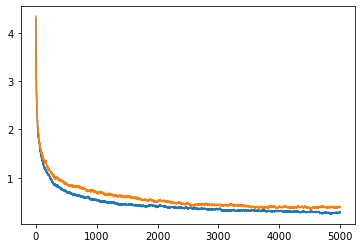

In [338]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

rho_sim=[]
for sim in tqdm(range(40)):
        
        print(sim)
        L=5000
        lattice_o = np.zeros((L,1000), dtype=int)
        lattice_o[0,0:1000]=np.random.choice([0,1 ,2], size=(1000), p=[0,0,1])
#         lattice_o[0,int(L/2)]=2
    
#         pv = [0.5673,0.569,0.572,0.579,0.582,0.589, 0.592,0.6,0.61,0.62,0.63,0.64,0.65,0.66]
        pv = [0.5473,0.5573,0.5673,0.5773, 0.5873]
#         pv=[0.58]

        sum_list=[]
        rho=[]
        for k in range(len(pv)):
            lattice=copy.copy(lattice_o)
            p = pv[k] 
            q=p

            for j in range(1,L):
                for i in range(0,1000):
                    if ((i!=1000-1) and (i!=0)):
                        z=np.random.rand(1)[0]
                        if lattice[j-1,i-1]==2 and lattice[j-1,i+1]==2 :
                            if z<q:
                                lattice[j,i]= 2
                            else:
                                lattice[j,i]= np.random.choice([0, 1], size=(1), p=[0.5, 0.5])[0]
                                
                            
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==0) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==1) :
                            lattice[j,i]= lattice[j-1,i-1]
                        
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==0) :
                            if z<p:
                                lattice[j,i]= 2
                            else: lattice[j,i]= 0
    
                        elif (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==2) or (lattice[j-1,i-1]==2 and lattice[j-1,i+1]==1) :
                            if z<p:
                                lattice[j,i]= 2
                            else: lattice[j,i]= 1
                                                                                       
                        elif (lattice[j-1,i-1]==0 and lattice[j-1,i+1]==1) or (lattice[j-1,i-1]==1 and lattice[j-1,i+1]==0) :
                             lattice[j,i]= 2
#                     else:
#                         if lattice[j-1,i]==2:
#                                 lattice[j,i]= np.random.choice([0, 1, 2], size=(1), p=[(1-p)/2,(1-p)/2, p])[0]
#                         else:
#                             lattice[j,i]=lattice[j-1,i]
                        
                sum_list.append((list(lattice[j,:])).count(2)/(1000))

            rho.append(sum_list)
            sum_list=[]
        rho_sim.append(rho)
a = np.mean(np.array(rho_sim),axis=0)
print(a)
plt.plot(a[0])
plt.plot(a[1])






In [367]:
with open("rho_sigma_nue_r_full_0.txt", 'w') as output:
    for row in a[0]:
        output.write(str(row) + '\n')
with open("rho_sigma_nue_r_full_1.txt", 'w') as output:
    for row in a[1]:
        output.write(str(row) + '\n')
with open("rho_sigma_nue_full_2.txt", 'w') as output:
    for row in a[2]:
        output.write(str(row) + '\n')
with open("rho_sigma_nue-full_3.txt", 'w') as output:
    for row in a[3]:
        output.write(str(row) + '\n')
with open("rho_sigma_nue-full_4.txt", 'w') as output:
    for row in a[4]:
        output.write(str(row) + '\n')

In [121]:
with open("rho_sigma_nue_r_full_0.txt", 'r') as file:
        data_1 = [float(line.strip()) for line in file]
        
with open("rho_sigma_nue_r_full_1.txt", 'r') as file:
        data_2 = [float(line.strip()) for line in file]
        
with open("rho_sigma_nue_full_2.txt", 'r') as file:
        data_3 = [float(line.strip()) for line in file]
        
with open("rho_sigma_nue-full_3.txt", 'r') as file:
        data_4 = [float(line.strip()) for line in file]

with open("rho_sigma_nue-full_4.txt", 'r') as file:
        data_5 = [float(line.strip()) for line in file]
    

### here I use this formula to have an estimation of  $\delta$

$$\rho(t) \sim t^{-\delta}$$

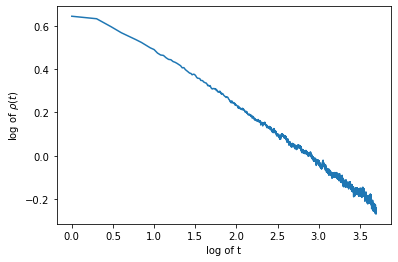

In [134]:
t = range(5000)

plt.plot(np.log10(t[1:]),np.log10(data_3))
plt.xlabel("log of t")
plt.ylabel(r"log of $\rho(t)$")
plt.show()

In [123]:
x_1=np.array(np.log10(t[1:]))
y_1=np.array(np.log10(data_3))

ii,ss =np.polyfit(x_1,y_1,1)


In [124]:
display(Latex(r'The $\delta$ is:'),-ii)

<IPython.core.display.Latex object>

0.27605773694530633

In [107]:
b0=[1.0]
b0=b0+list(data_1)

b1=[1.0]
b1=b1+list(data_2)

b2=[1.0]
b2=b2+list(data_4)

b3=[1.0]
b3=b3+list(data_5)

nue: 2.8


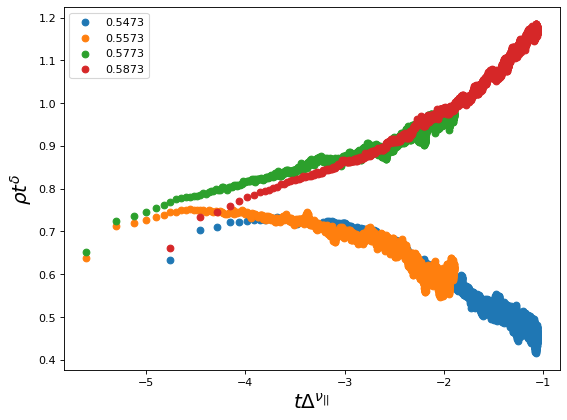

nue: 3


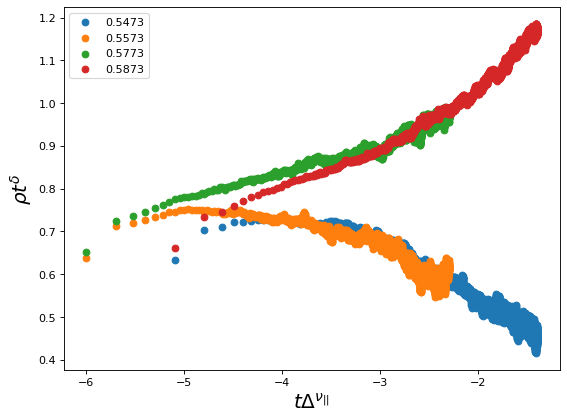

nue: 3.2


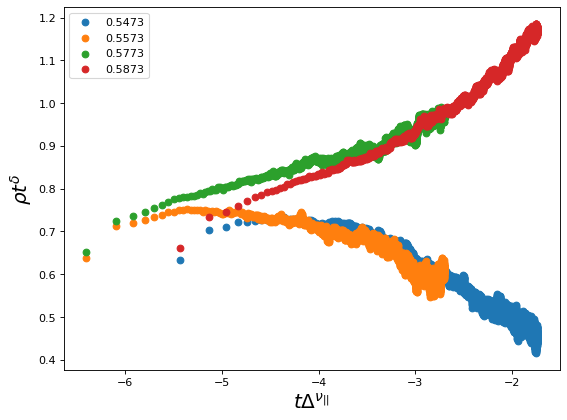

nue: 3.27


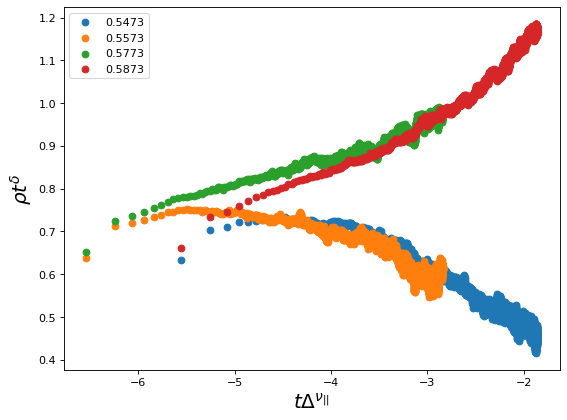

nue: 3.3


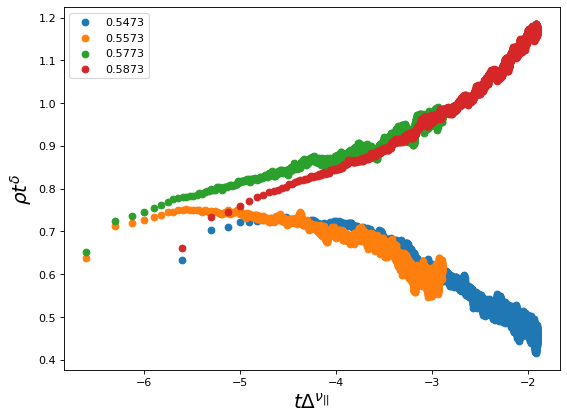

nue: 4


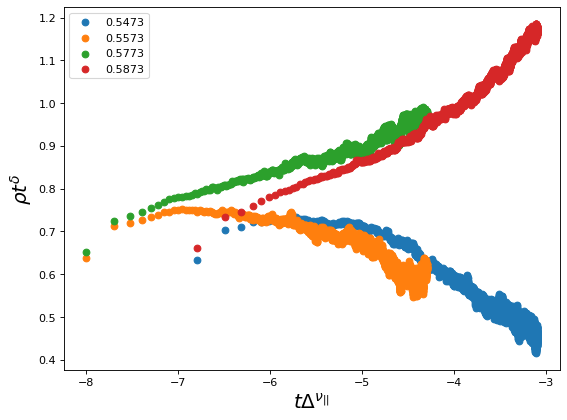

In [130]:
sigma=-ii

b00=[(idx**sigma)*i for idx, i in enumerate(b0)]
b01=[(idx**sigma)*i for idx, i in enumerate(b1)]
b02=[(idx**sigma)*i for idx, i in enumerate(b2)]
b03=[(idx**sigma)*i for idx, i in enumerate(b3)]

pv = [0.5473,0.5573,0.5773, 0.5873]
epsilon=[abs(j-0.5673) for j in pv]

nue=[2.8,3,3.2,3.27,3.3,4]
for n in nue:
    print("nue:",n)
    c00=[idx*((epsilon[0])**(n)) for idx, i in enumerate(b0)]
    c01=[idx*(epsilon[1]**n) for idx, i in enumerate(b1)]
    c02=[idx*(epsilon[2]**n) for idx, i in enumerate(b2)]
    c03=[idx*(epsilon[3]**n) for idx, i in enumerate(b3)]
    figure(figsize=(8, 6), dpi=80)

    plt.scatter(np.log10(c00[1:]),np.log10(b00[1:]),label= pv[0])
    plt.scatter(np.log10(c01[1:]),np.log10(b01[1:]),label= pv[1])
    plt.scatter(np.log10(c02[1:]),np.log10(b02[1:]),label= pv[2])
    plt.scatter(np.log10(c03[1:]),np.log10(b03[1:]),label= pv[3])
    plt.xlabel(r"$t\Delta ^{\nu_{||}}$",fontsize=18)
    plt.ylabel(r"$\rho t^{\delta}$",fontsize=18)
    plt.legend(loc="upper left")
    plt.show()

#### I chose $\nu_{||} = 3.2$ which was a better colapse , and the $\beta$ will be 
$$\delta \times \nu_{||} = 0.8833847582249803$$